In [93]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestRegressor

In [46]:
train_df = pd.read_csv('house_prices_train.csv')
test_df = pd.read_csv('house_prices_test.csv')

In [47]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [49]:
print('Number of duplicates: ', train_df.duplicated().sum())

Number of duplicates:  0


In [50]:
print('Number of duplicates: ', test_df.duplicated().sum())

Number of duplicates:  0


In [51]:
missing_values = train_df.isnull().sum().sort_values(ascending=False)

#filter the columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

#count how many columns have missing values
num_columns_with_missing_values = len(columns_with_missing_values)

#calculate percent
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([missing_values, percent*100], axis=1, keys=['Missing Values', 'Percent'])

print(f"Number of columns with missing values: {num_columns_with_missing_values}")
print("Columns with missing values and their count:")
missing_data.head(19)

Number of columns with missing values: 19
Columns with missing values and their count:


,Missing Values,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [52]:
missing_values = test_df.isnull().sum().sort_values(ascending=False)

#filter the columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

#count how many columns have missing values
num_columns_with_missing_values = len(columns_with_missing_values)

#calculate percent
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([missing_values, percent*100], axis=1, keys=['Missing Values', 'Percent'])

print(f"Number of columns with missing values: {num_columns_with_missing_values}")
print("Columns with missing values and their count:")
missing_data.head(33)

Number of columns with missing values: 33
Columns with missing values and their count:


,Missing Values,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127
GarageCond,78,5.346127


In [53]:
train_df.fillna(value={col: 'missing' for col in train_df.select_dtypes(include=['object']).columns}, inplace=True)
test_df.fillna(value={col: 'missing' for col in test_df.select_dtypes(include=['object']).columns}, inplace=True)
train_df.fillna(train_df.median(numeric_only=True), inplace=True)
test_df.fillna(test_df.median(numeric_only=True), inplace=True)

In [54]:
missing_values = train_df.isnull().sum().sort_values(ascending=False)

#filter the columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

#count how many columns have missing values
num_columns_with_missing_values = len(columns_with_missing_values)

print(f"Number of columns with missing values: {num_columns_with_missing_values}")

Number of columns with missing values: 0


In [55]:
missing_values = test_df.isnull().sum().sort_values(ascending=False)

#filter the columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

#count how many columns have missing values
num_columns_with_missing_values = len(columns_with_missing_values)

print(f"Number of columns with missing values: {num_columns_with_missing_values}")

Number of columns with missing values: 0


# Data Visualization

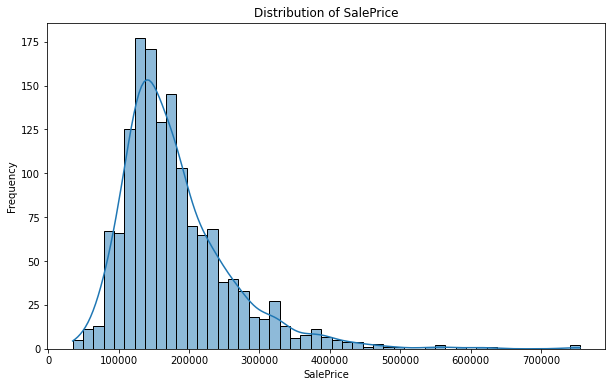

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

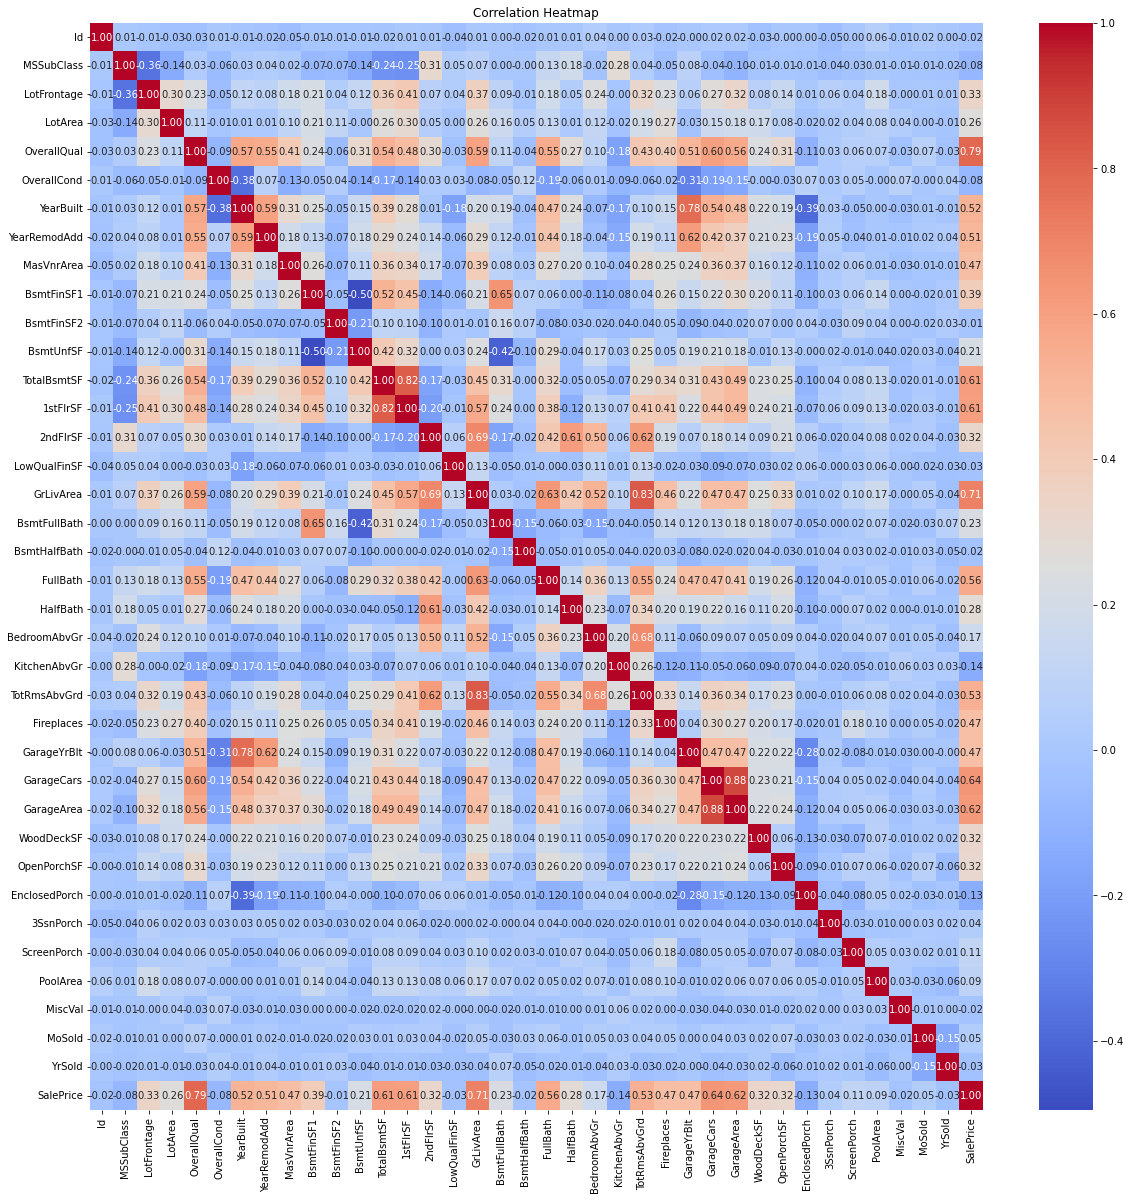

In [20]:
plt.figure(figsize=(20, 20))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation map, it seems that sales price is most correlated to overall quality (0.79), ground living area square feet (0.71), size of garage in car capacity (0.64), size of garage in square feet (0.62), total square feet of basement (0.61), and 1st floor square feet (0.61). 

## Visualize relationship between Sales Price and the highest correlations

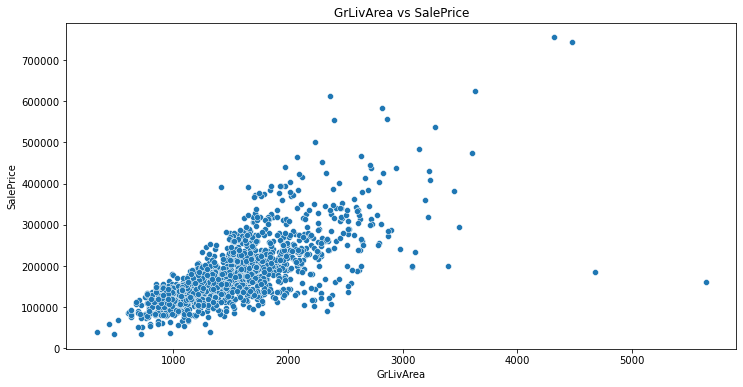

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

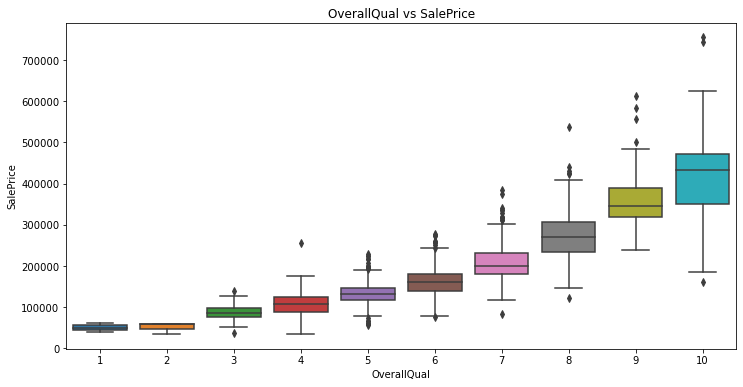

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_df['OverallQual'], y=train_df['SalePrice'])
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

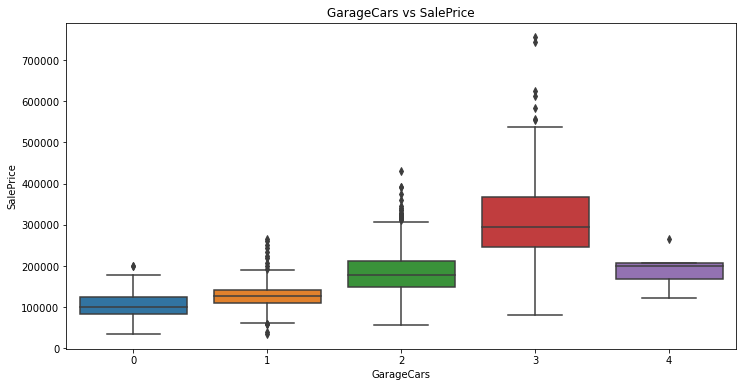

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_df['GarageCars'], y=train_df['SalePrice'])
plt.title('GarageCars vs SalePrice')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

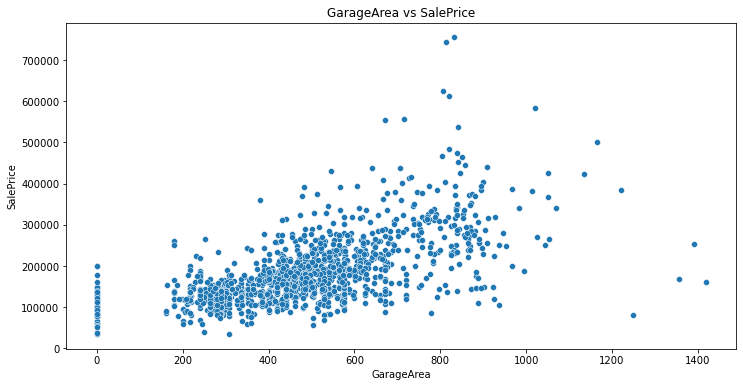

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train_df['GarageArea'], y=train_df['SalePrice'])
plt.title('GarageArea vs SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

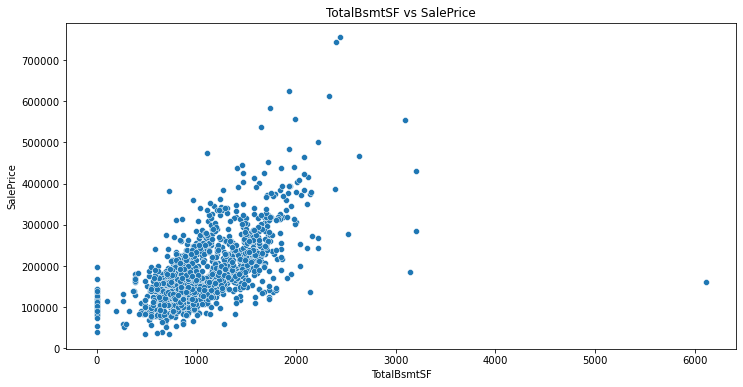

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train_df['TotalBsmtSF'], y=train_df['SalePrice'])
plt.title('TotalBsmtSF vs SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

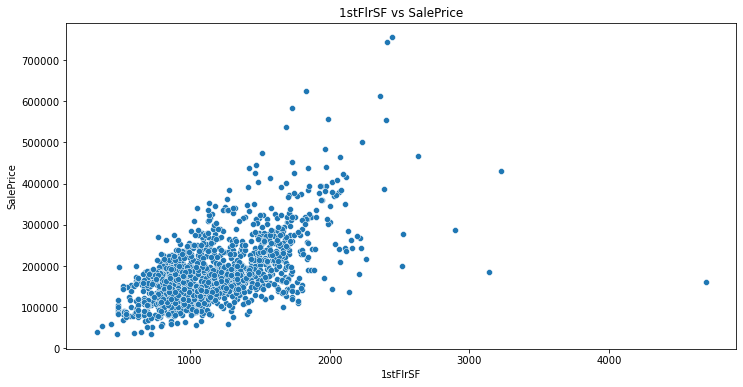

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train_df['1stFlrSF'], y=train_df['SalePrice'])
plt.title('1stFlrSF vs SalePrice')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()

## Visualize Relationship between YearBuilt and SalePrice

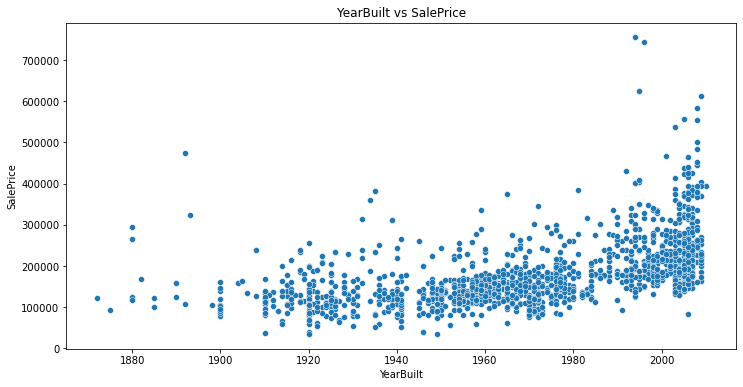

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train_df['YearBuilt'], y=train_df['SalePrice'])
plt.title('YearBuilt vs SalePrice')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

# Train the models

In [57]:
#one-hot encode categorical features
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [58]:
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

In [59]:
#drop the target column from test_df if present
if 'SalePrice' in test_df.columns:
    test_df.drop(columns=['SalePrice'], inplace=True)

In [60]:
#splitting features and target variable
X = train_df.drop(columns=['Id', 'SalePrice'])
y = train_df['SalePrice']
X_test = test_df.drop(columns=['Id'])

In [61]:
#scaling numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [62]:
#split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Neural Network

In [75]:
#Model 1: Neural Network
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model1.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
37/37 [==============================] - 1s 6ms/step - loss: 38882222080.0000 - val_loss: 39641952256.0000
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 38826541056.0000 - val_loss: 39484776448.0000
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 38370488320.0000 - val_loss: 38511689728.0000
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 36456300544.0000 - val_loss: 35153702912.0000
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 31377907712.0000 - val_loss: 27658792960.0000
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 21951596544.0000 - val_loss: 16718759936.0000
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 11989176320.0000 - val_loss: 7972756992.0000
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 6535395328.0000 - val_loss: 5050491392.0000
Epoch 9/100
37/37 [==============================] 

In [76]:
val_predictions1 = model1.predict(X_val)

#calculate regression metrics
val_mse = mean_squared_error(y_val, val_predictions1)
val_r2 = r2_score(y_val, val_predictions1)

#print the metrics
print("Validation Performance:")
print(f"Mean Squared Error: {val_mse:.2f}")
print(f"R-squared Score: {val_r2:.2f}")

10/10 [==============================] - 0s 4ms/step
Validation Performance:
Mean Squared Error: 1301038483.99
R-squared Score: 0.83


In [77]:
nn_predictions1 = model1.predict(X_test)

#save Model 1 predictions
submission1 = pd.DataFrame({'Id': test_df['Id'], 'SalePrice_NeuralNetwork': nn_predictions1.flatten()})
submission1_path = 'submission1.csv'
submission1.to_csv(submission1_path, index=False)

46/46 [==============================] - 0s 1ms/step


In [78]:
print(submission1.head())

     Id  SalePrice_NeuralNetwork
0  1461            119380.242188
1  1462            159894.312500
2  1463            189386.375000
3  1464            182340.078125
4  1465            194273.265625


## Random Forest

In [79]:
#Model 2: Random Forest Regressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [80]:
val_predictions2 = model2.predict(X_val)

val_mse2 = mean_squared_error(y_val, val_predictions2)
val_r2_2 = r2_score(y_val, val_predictions2)

print("Validation Performance for Random Forest:")
print(f"Mean Squared Error: {val_mse2:.2f}")
print(f"R-squared Score: {val_r2_2:.2f}")

Validation Performance for Random Forest:
Mean Squared Error: 817792745.54
R-squared Score: 0.89


In [81]:
predictions2 = model2.predict(X_test)

submission2 = pd.DataFrame({'Id': test_df['Id'], 'SalePrice_RandomForest': predictions2})
submission2_path = 'submission2.csv'
submission2.to_csv(submission2_path, index=False)

In [82]:
print(submission2.head())

     Id  SalePrice_RandomForest
0  1461               130365.50
1  1462               153196.50
2  1463               177979.50
3  1464               189527.10
4  1465               202455.56


## Gradient Boosting

In [83]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_val)

gb_mse = mean_squared_error(y_val, gb_predictions)
gb_r2 = r2_score(y_val, gb_predictions)

print("Gradient Boosting:")
print(f"Mean Squared Error: {gb_mse:.2f}")
print(f"R-squared Score: {gb_r2:.2f}")

Gradient Boosting:
Mean Squared Error: 734052783.21
R-squared Score: 0.90


In [84]:
predictions3 = gb_model.predict(X_test)

submission3 = pd.DataFrame({'Id': test_df['Id'], 'SalePrice_GradientBoosting': predictions3})
submission3_path = 'submission3.csv'
submission3.to_csv(submission3_path, index=False)

In [85]:
print(submission3.head())

     Id  SalePrice_GradientBoosting
0  1461               127628.904106
1  1462               161072.899131
2  1463               172761.980601
3  1464               184986.371956
4  1465               200308.610225


# Evaluation

In [102]:
#create a dictionary to store R-squared scores of all models
r_squared_scores = {}

#Neural Network
r_squared_scores['Neural Network'] = val_r2

#Random Forest
r_squared_scores['Random Forest'] = val_r2_2

#Gradient Boosting
r_squared_scores['Gradient Boosting'] = gb_r2


#summary
print("Summary of R-squared Scores:")
for model, r_squared in r_squared_scores.items():
    print(f"{model}: R-squared Score = {r_squared:.2f}")

Summary of R-squared Scores:
Neural Network: R-squared Score = 0.83
Random Forest: R-squared Score = 0.89
Gradient Boosting: R-squared Score = 0.90


In [103]:
#combine the predictions into one DataFrame
combined_predictions = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice_NeuralNetwork': nn_predictions1.flatten(),
    'SalePrice_RandomForest': predictions2,
    'SalePrice_GradientBoosting': predictions3,
})

#save the combined predictions
combined_submission_path = 'combined_submission.csv'
combined_predictions.to_csv(combined_submission_path, index=False)

#display the path to the combined predictions file
print("Combined submission saved to:", combined_submission_path)

#print the first 10 lines of the combined submission
print(combined_predictions.head(10))

Combined submission saved to: combined_submission.csv
     Id  SalePrice_NeuralNetwork  SalePrice_RandomForest  \
0  1461            119380.242188               130365.50   
1  1462            159894.312500               153196.50   
2  1463            189386.375000               177979.50   
3  1464            182340.078125               189527.10   
4  1465            194273.265625               202455.56   
5  1466            174427.218750               184224.55   
6  1467            169555.750000               172322.55   
7  1468            154396.578125               178613.46   
8  1469            161111.562500               180704.01   
9  1470            136766.265625               119953.33   

   SalePrice_GradientBoosting  
0               127628.904106  
1               161072.899131  
2               172761.980601  
3               184986.371956  
4               200308.610225  
5               175566.592563  
6               173135.419800  
7               163257.609521